In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

## Point Anomaly

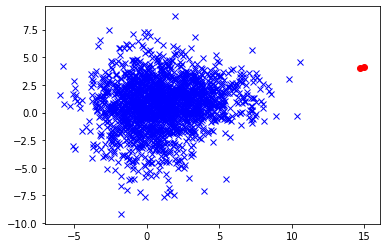

In [ ]:
np.random.seed(42)
mean1 = [0, 0]
cov1 = [[3, 0], [0, 8]]  # diagonal covariance

mean2 = [2, 1.3]
cov2 = [[7, 0], [0, 2]]  # diagonal covariance

meana = [15, 4]
cova = [[0.1, 0], [0, 0.1]]  # diagonal covariance

X = np.concatenate((np.random.multivariate_normal(mean1, cov1, 1000),
                    np.random.multivariate_normal(mean2, cov2, 1000)))
Xa = np.random.multivariate_normal(meana, cova, 2)

# np.concatenate((X1,X2,Xa),0)
plt.plot(X[:,0], X[:,1],'bx')
plt.plot(Xa[:,0], Xa[:,1],'ro')

## 3-σ anomaly detection example shown in the presentation

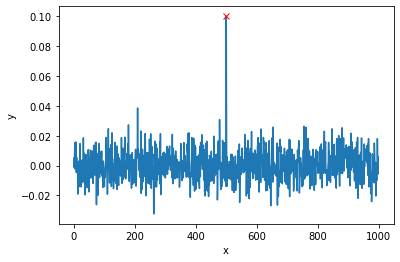

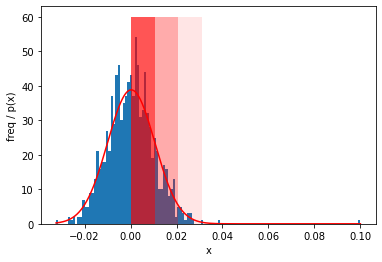

In [ ]:
np.random.seed(42)
Xp = 0.01 * np.random.randn(1000)
Xp[500] = 0.1
plt.plot(Xp)
plt.plot(500, Xp[500],'rx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


mu = np.mean(Xp)
sigma = np.std(Xp)
x = np.linspace(Xp.min(), Xp.max(), 5000)
pdf = norm(mu, sigma).pdf(x)

plt.hist(Xp,128)
plt.plot(x,pdf,'r-')
plt.xlabel('x')
plt.ylabel('freq / p(x)')
plt.fill([mu, mu, mu + sigma, mu + sigma], [0, 60, 60, 0],'r', alpha = 0.5)
plt.fill([mu, mu, mu + 2*sigma, mu + 2*sigma], [0, 60, 60, 0],'r', alpha = 0.25)
plt.fill([mu, mu, mu + 3*sigma, mu + 3*sigma], [0, 60, 60, 0],'r', alpha = 0.1)
plt.show()


## Context Anomaly

In [ ]:
np.random.seed(42)
# we generate slightly perturbed sines
x = np.linspace(0,12*np.pi,1000)
y = np.sin(x) + 0.1 * np.random.randn(len(x))
# with a small region which "does not fit into the context"
y[550:670] = 0
yprev = np.sin(x[550:670])

# just plotting the stuff
plt.plot(x,y)
plt.plot(x[550:670],y[550:670],'r--',linewidth = 3)
plt.ylim([-1,3])
plt.plot(x[550:670],yprev,'b--',linewidth = 0.5, alpha = 0.75)

NameError: ignored

## Group anomaly 
While most points (blue ones) are scattered with moreless consistent covariance (~diag([5,5])), the anomalous region has very different density due to different covariance diag([0.1,0.1])

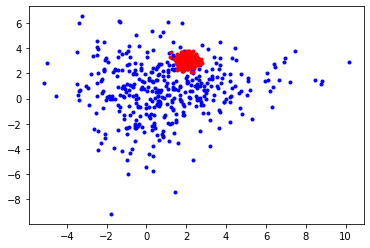

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb57d5a83d0>,
      dtype=object)

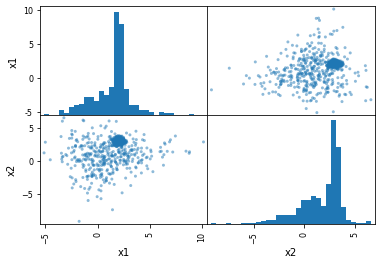

In [ ]:
np.random.seed(42)
mean1 = [0, 0]
cov1 = [[3, 0], [0, 8]]  # diagonal covariance

mean2 = [2, 1.3]
cov2 = [[7, 0], [0, 2]]  # diagonal covariance

meana = [2, 3]
cova = [[0.1, 0], [0, 0.1]]  # diagonal covariance

X = np.concatenate((np.random.multivariate_normal(mean1, cov1, 200),
                    np.random.multivariate_normal(mean2, cov2, 200)))
Xa = np.random.multivariate_normal(meana, cova, 300)

# np.concatenate((X1,X2,Xa),0)

plt.plot(X[:,0], X[:,1],'b.')
plt.plot(Xa[:,0], Xa[:,1],'r.')
plt.show()

df = pd.DataFrame(np.concatenate((X,Xa)), columns= ['x1','x2'])
pd.plotting.scatter_matrix(df,hist_kwds={'bins' : 32})


## IsolationForest
The aforementioned example with Gaussian won't work if the data aren't based on normal distribution

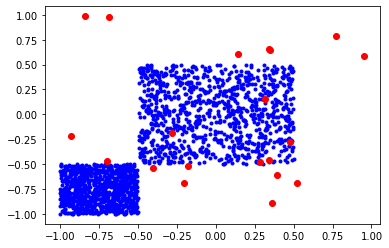

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43b4be5dd0>,
      dtype=object)

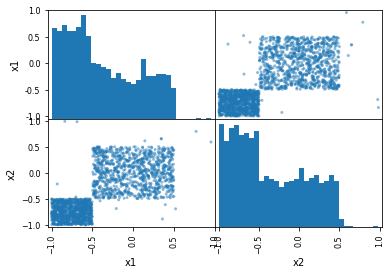

In [ ]:
from sklearn.ensemble import IsolationForest

np.random.seed(42)
Xn1 = np.random.rand(1000,2) - 0.5
Xn2 = (np.random.rand(1000,2) - 2) * 0.5
Xn = np.concatenate((Xn1,Xn2))
Xa = 2 * (np.random.rand(20,2) - 0.5)
X = np.concatenate((Xn,Xa))
plt.plot(Xn[:,0],Xn[:,1],'b.')
plt.plot(Xa[:,0],Xa[:,1],'ro')
# plt.title('Generated Samples')
plt.show()

df = pd.DataFrame(X, columns = ['x1','x2'])
pd.plotting.scatter_matrix(df, hist_kwds={'bins' : 32})
# plt.suptitle('Matrix of Scatter Plots')

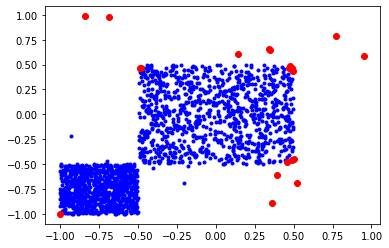

In [ ]:

# Isolation forest imeplementation from sklearn

# this is a ration between number of anomalies and normal samples, since we know it, it is easy
# it can also be determined "automatically"
contamination = float(Xa.shape[0]) / X.shape[0] 
l = IsolationForest(contamination = contamination, random_state = 42).fit_predict(X)
plt.plot(X[l!=-1,0],X[l!=-1,1],'b.')
plt.plot(X[l!=1,0],X[l!=1,1],'ro')
# plt.title('Results of IsolationForest')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


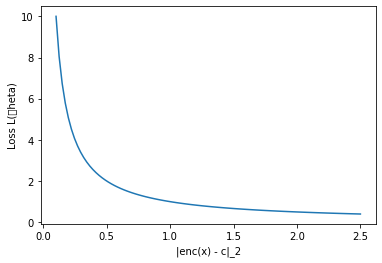

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
    
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18}) 

distances = np.linspace(0.1,2.5,100)
loss = 1./distances

plt.plot(distances, loss)
plt.ylabel('loss $L$')
plt.xlabel('$L_2$ distance $s=\|enc(\mathbf{x}) - \mathbf{c}\|_2$')
plt.grid(True)
plt.show()

## Renders the Deep Semi-supervised Anomaly Loss 
Loss = 1/score(x_{i}), if x_{i} is an anomaly